In [1]:
# import 套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [8]:
a=pd.DataFrame([30,20,30,60],columns=['A'])
b=pd.DataFrame([20,10,0,80],columns=['B'])
c=pd.concat([a,b],axis=1)
clf = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
y_pred = clf.fit_predict(c)

In [52]:
print('1.計算點與點的距離:')
print(clf.kneighbors())
print('\n2.計算點與點的可達距離:')
print('''\n3.計算點的密度:
  密度的算法要用鄰近的那2個點到該點的可達距離，若超過可達距離則是直接距離
  例如A-D距離67、B-D距離80，THEN密度(DR)=1/(147/2)\n''')
print(clf._lrd)
print('\n4.評估異常值:')
print(clf.negative_outlier_factor_)
clf._distances_fit_X_

1.計算點與點的距離:
(array([[14.14213562, 20.        ],
       [14.14213562, 14.14213562],
       [14.14213562, 20.        ],
       [67.08203932, 80.62257748]]), array([[1, 2],
       [0, 2],
       [1, 0],
       [0, 1]], dtype=int64))

2.計算點與點的可達距離:

3.計算點的密度:
  密度的算法要用鄰近的那2個點到該點的可達距離，若超過可達距離則是直接距離
  例如A-D距離67、B-D距離80，THEN密度(DR)=1/(147/2)

[0.05857864 0.05       0.05857864 0.01354054]

4.評估異常值:
[-0.9267767  -1.17157288 -0.9267767  -4.00939174]


array([[14.14213562, 20.        ],
       [14.14213562, 14.14213562],
       [14.14213562, 20.        ],
       [67.08203932, 80.62257748]])

# 隨機範例

In [2]:
np.random.seed (45375)
a1=np.random.rand(10)*5+20
b1=np.random.rand(10)*10+165

In [4]:
a=pd.DataFrame(a1,columns=['age'])
b=pd.DataFrame(b1,columns=['height'])
c=pd.concat([a,b],axis=1)
c.iloc[2]=[25,195]
c=round(c,1)
c

,age,height
0,20.9,165.8
1,21.4,174.7
2,25.0,195.0
3,20.1,173.6
4,22.6,172.8
5,23.3,167.2
6,23.9,174.2
7,24.4,165.8
8,23.6,174.6
9,21.9,169.5


In [ ]:
plt.scatter(c['age'],c['height'])
plt.xlabel('age')
plt.ylabel('height')
plt.show()

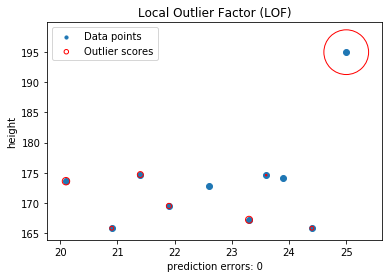

In [5]:
np.random.seed(42)

n_outliers = 2
ground_truth = np.ones(len(c), dtype=int)
ground_truth[2] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(c)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(c.iloc[:, 0], c.iloc[:, 1] ,label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(c.iloc[:, 0], c.iloc[:, 1], s=2000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
# plt.xlabel('age')
plt.xlabel("prediction errors: %d" % (n_errors))
plt.ylabel('height')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
pd.DataFrame(-clf.negative_outlier_factor_)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(np.array(c['age']).reshape(-1, 1), c.iloc[:, 1])

In [ ]:
xfit = np.linspace(20, 25, 10)

plt.scatter(c.iloc[:, 0], c.iloc[:, 1])
plt.plot(xfit, reg.predict(xfit[:, np.newaxis]), c='red', linewidth=3)
plt.xlabel('age')
plt.ylabel('height')
axes = plt.gca()
axes.set_ylim([165,196])

In [ ]:
reg.score(np.array(c['age']).reshape(-1, 1), c.iloc[:, 1])

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(c.iloc[:, 1], reg.predict(np.array(c['age']).reshape(-1, 1))))

In [ ]:
c=c.drop(c.index[2])

In [ ]:
from sklearn.feature_selection import f_regression
f_regression(np.array(c['age']).reshape(-1, 1), c.iloc[:, 1])

# 範例資料檔

In [2]:
df=pd.read_csv('C:/Users/6506/Desktop/簡報製作/範例資料檔.csv',encoding='ANSI',index_col='No.')

In [ ]:
# 匯入資料相對路徑
import os
path=os.path.abspath('.') +'/範例資料檔.csv'
df=pd.read_csv(open(path))

In [3]:
d=df.dtypes==object
for i in d[d==True].index[0:]:
    dummies=pd.get_dummies( df.loc[:, i], prefix=i)
    df = pd.concat( [df, dummies], axis = 1 )
    df=df.drop(i,axis=1)

In [6]:
from sklearn import preprocessing
df.iloc[:,0:] = preprocessing.scale(df.iloc[:,0:])

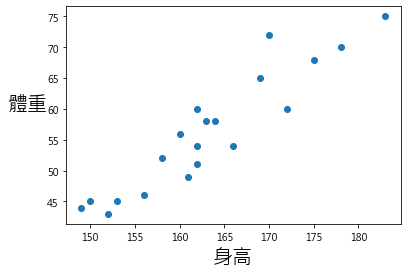

In [23]:
#匯入字體
from matplotlib.font_manager import FontProperties
# myfont = FontProperties(fname=r'C:\Users\6506\Desktop\msjh.ttc')
# 定義二維圖表
def pltgraph(x,y):
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.scatter(df[x],df[y])
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20,rotation=0,labelpad=20)
pltgraph('身高','體重')

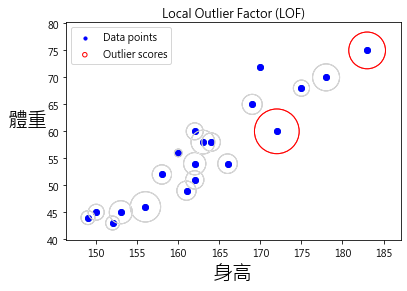

In [39]:
# 定義 LOF模型
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
# fit LOF模型
y_pred = clf.fit_predict(df.iloc[:,:2])
# 計算各資料之LOF分數
X_scores = clf.negative_outlier_factor_

# 代入身高體重
pltgraph('身高','體重')
# 繪製標題
plt.title("Local Outlier Factor (LOF)")
# 繪製資料
data=plt.scatter(df.iloc[:, 0], df.iloc[:, 1] ,c='b',label='Data points')
# 計算各資料之半徑
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# 繪製Outlier與非Outlier之圓形
outlier=plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=2000 * radius, edgecolors=np.where(y_pred==1,'gray','r'),
            facecolors='none', label='Outlier scores')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=2000 * radius, edgecolors=np.where(y_pred==1,'w','r'),alpha=0.7,
            facecolors='none')
# 繪製標籤
plt.axis('tight')
legend = plt.legend(handles=[data,outlier],loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

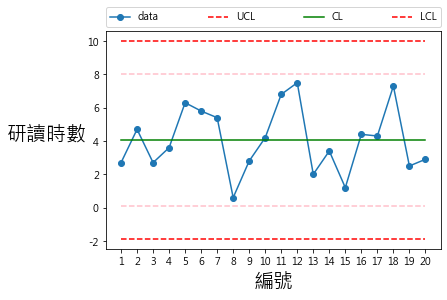

In [10]:
# 若只針對單項因子監控是否有異常值，可使用管制圖
def ControlChart(y):
    # 定義二維圖表
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(df.index,df[y],  marker='o',label='data')
    plt.xlabel('編號', fontsize=20)
    plt.ylabel(y, fontsize=20,rotation='horizontal',labelpad=40,verticalalignment='baseline')
    plt.xticks(np.linspace(1, len(df), len(df)))
    # 計算管制界線(平均值上下3個標準差)
    x_std=lambda x:[df[y].mean()+x*df[y].std()]*len(df)
    plt.plot(df.index,x_std(3), label='UCL', linestyle='--',c='r')
    plt.plot(df.index,x_std(2), linestyle='--',c='pink')
    plt.plot(df.index,x_std(0), label='CL', linestyle='-',c='g')
    plt.plot(df.index,x_std(-2), linestyle='--',c='pink')
    plt.plot(df.index,x_std(-3), label='LCL', linestyle='--',c='r')
    # 繪製標籤
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=4)
    plt.show()
ControlChart('研讀時數')

In [ ]:
d=df.dtypes==object
for i in d[d==False].index[0:]:
    ControlChart(i)

In [ ]:
#建立迴歸模型
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg=LinearRegression().fit(np.array(df['身高']).reshape(-1, 1), df['體重'])
xfit = np.linspace(145, 185, 10)

pltgraph('身高','體重')
plt.plot(xfit, reg.predict(xfit[:, np.newaxis]), c='red', linewidth=3)
plt.scatter(df['身高'], df['體重'], s=2000 * radius, edgecolors=np.where(y_pred==1,'none','r'),
            facecolors='none', label='Outlier scores')
axes = plt.gca()
plt.show()
print('RMSE=',np.sqrt(mean_squared_error(df['體重'], reg.predict(np.array(df['身高']).reshape(-1, 1)))))

In [ ]:
#移除異常值
df=df.drop(df.index[np.where(y_pred==-1)])

reg=LinearRegression().fit(np.array(df['身高']).reshape(-1, 1), df['體重'])
xfit = np.linspace(145, 185, 10)

pltgraph('身高','體重')
plt.plot(xfit, reg.predict(xfit[:, np.newaxis]), c='red', linewidth=3)
axes = plt.gca()
plt.show()
print('RMSE=',np.sqrt(mean_squared_error(df['體重'], reg.predict(np.array(df['身高']).reshape(-1, 1)))))

In [ ]:
# %load C:/Users/6506/AppData/Local/Continuum/anaconda3/Lib/site-packages/sklearn/neighbors/lof.py
# Authors: Nicolas Goix <nicolas.goix@telecom-paristech.fr>
#          Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
# License: BSD 3 clause

import numpy as np
import warnings

from .base import NeighborsBase
from .base import KNeighborsMixin
from .base import UnsupervisedMixin
from ..base import OutlierMixin

from ..utils.validation import check_is_fitted
from ..utils import check_array

__all__ = ["LocalOutlierFactor"]


class LocalOutlierFactor(NeighborsBase, KNeighborsMixin, UnsupervisedMixin,
                         OutlierMixin):
    """Unsupervised Outlier Detection using Local Outlier Factor (LOF)

    The anomaly score of each sample is called Local Outlier Factor.
    It measures the local deviation of density of a given sample with
    respect to its neighbors.
    It is local in that the anomaly score depends on how isolated the object
    is with respect to the surrounding neighborhood.
    More precisely, locality is given by k-nearest neighbors, whose distance
    is used to estimate the local density.
    By comparing the local density of a sample to the local densities of
    its neighbors, one can identify samples that have a substantially lower
    density than their neighbors. These are considered outliers.

    Parameters
    ----------
    n_neighbors : int, optional (default=20)
        Number of neighbors to use by default for :meth:`kneighbors` queries.
        If n_neighbors is larger than the number of samples provided,
        all samples will be used.

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
        Algorithm used to compute the nearest neighbors:

        - 'ball_tree' will use :class:`BallTree`
        - 'kd_tree' will use :class:`KDTree`
        - 'brute' will use a brute-force search.
        - 'auto' will attempt to decide the most appropriate algorithm
          based on the values passed to :meth:`fit` method.

        Note: fitting on sparse input will override the setting of
        this parameter, using brute force.

    leaf_size : int, optional (default=30)
        Leaf size passed to :class:`BallTree` or :class:`KDTree`. This can
        affect the speed of the construction and query, as well as the memory
        required to store the tree. The optimal value depends on the
        nature of the problem.

    metric : string or callable, default 'minkowski'
        metric used for the distance computation. Any metric from scikit-learn
        or scipy.spatial.distance can be used.

        If 'precomputed', the training input X is expected to be a distance
        matrix.

        If metric is a callable function, it is called on each
        pair of instances (rows) and the resulting value recorded. The callable
        should take two arrays as input and return one value indicating the
        distance between them. This works for Scipy's metrics, but is less
        efficient than passing the metric name as a string.

        Valid values for metric are:

        - from scikit-learn: ['cityblock', 'cosine', 'euclidean', 'l1', 'l2',
          'manhattan']

        - from scipy.spatial.distance: ['braycurtis', 'canberra', 'chebyshev',
          'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski',
          'mahalanobis', 'minkowski', 'rogerstanimoto', 'russellrao',
          'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
          'yule']

        See the documentation for scipy.spatial.distance for details on these
        metrics:
        https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

    p : integer, optional (default=2)
        Parameter for the Minkowski metric from
        :func:`sklearn.metrics.pairwise.pairwise_distances`. When p = 1, this
        is equivalent to using manhattan_distance (l1), and euclidean_distance
        (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

    metric_params : dict, optional (default=None)
        Additional keyword arguments for the metric function.

    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set, i.e. the proportion
        of outliers in the data set. When fitting this is used to define the
        threshold on the decision function. If "auto", the decision function
        threshold is determined as in the original paper.

        .. versionchanged:: 0.20
           The default value of ``contamination`` will change from 0.1 in 0.20
           to ``'auto'`` in 0.22.

    novelty : boolean, default False
        By default, LocalOutlierFactor is only meant to be used for outlier
        detection (novelty=False). Set novelty to True if you want to use
        LocalOutlierFactor for novelty detection. In this case be aware that
        that you should only use predict, decision_function and score_samples
        on new unseen data and not on the training set.

    n_jobs : int or None, optional (default=None)
        The number of parallel jobs to run for neighbors search.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
        Affects only :meth:`kneighbors` and :meth:`kneighbors_graph` methods.


    Attributes
    ----------
    negative_outlier_factor_ : numpy array, shape (n_samples,)
        The opposite LOF of the training samples. The higher, the more normal.
        Inliers tend to have a LOF score close to 1 (``negative_outlier_factor_``
        close to -1), while outliers tend to have a larger LOF score.

        The local outlier factor (LOF) of a sample captures its
        supposed 'degree of abnormality'.
        It is the average of the ratio of the local reachability density of
        a sample and those of its k-nearest neighbors.

    n_neighbors_ : integer
        The actual number of neighbors used for :meth:`kneighbors` queries.

    offset_ : float
        Offset used to obtain binary labels from the raw scores.
        Observations having a negative_outlier_factor smaller than `offset_`
        are detected as abnormal.
        The offset is set to -1.5 (inliers score around -1), except when a
        contamination parameter different than "auto" is provided. In that
        case, the offset is defined in such a way we obtain the expected
        number of outliers in training.

    References
    ----------
    .. [1] Breunig, M. M., Kriegel, H. P., Ng, R. T., & Sander, J. (2000, May).
           LOF: identifying density-based local outliers. In ACM sigmod record.
    """
    def __init__(self, n_neighbors=20, algorithm='auto', leaf_size=30,
                 metric='minkowski', p=2, metric_params=None,
                 contamination="legacy", novelty=False, n_jobs=None):
        super().__init__(
            n_neighbors=n_neighbors,
            algorithm=algorithm,
            leaf_size=leaf_size, metric=metric, p=p,
            metric_params=metric_params, n_jobs=n_jobs)
        self.contamination = contamination
        self.novelty = novelty

    @property
    def fit_predict(self):
        """"Fits the model to the training set X and returns the labels.

        Label is 1 for an inlier and -1 for an outlier according to the LOF
        score and the contamination parameter.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features), default=None
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. to the training samples.

        y : Ignored
            not used, present for API consistency by convention.

        Returns
        -------
        is_inlier : array, shape (n_samples,)
            Returns -1 for anomalies/outliers and 1 for inliers.
        """

        # As fit_predict would be different from fit.predict, fit_predict is
        # only available for outlier detection (novelty=False)

        if self.novelty:
            msg = ('fit_predict is not available when novelty=True. Use '
                   'novelty=False if you want to predict on the training set.')
            raise AttributeError(msg)

        return self._fit_predict

    def _fit_predict(self, X, y=None):
        """"Fits the model to the training set X and returns the labels.

        Label is 1 for an inlier and -1 for an outlier according to the LOF
        score and the contamination parameter.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features), default=None
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. to the training samples.

        Returns
        -------
        is_inlier : array, shape (n_samples,)
            Returns -1 for anomalies/outliers and 1 for inliers.
        """

        # As fit_predict would be different from fit.predict, fit_predict is
        # only available for outlier detection (novelty=False)

        return self.fit(X)._predict()

    def fit(self, X, y=None):
        """Fit the model using X as training data.

        Parameters
        ----------
        X : {array-like, sparse matrix, BallTree, KDTree}
            Training data. If array or matrix, shape [n_samples, n_features],
            or [n_samples, n_samples] if metric='precomputed'.

        y : Ignored
            not used, present for API consistency by convention.

        Returns
        -------
        self : object
        """
        if self.contamination == "legacy":
            warnings.warn('default contamination parameter 0.1 will change '
                          'in version 0.22 to "auto". This will change the '
                          'predict method behavior.',
                          FutureWarning)
            self._contamination = 0.1
        else:
            self._contamination = self.contamination

        if self._contamination != 'auto':
            if not(0. < self._contamination <= .5):
                raise ValueError("contamination must be in (0, 0.5], "
                                 "got: %f" % self._contamination)

        super().fit(X)

        n_samples = self._fit_X.shape[0]
        if self.n_neighbors > n_samples:
            warnings.warn("n_neighbors (%s) is greater than the "
                          "total number of samples (%s). n_neighbors "
                          "will be set to (n_samples - 1) for estimation."
                          % (self.n_neighbors, n_samples))
        self.n_neighbors_ = max(1, min(self.n_neighbors, n_samples - 1))

        self._distances_fit_X_, _neighbors_indices_fit_X_ = (
            self.kneighbors(None, n_neighbors=self.n_neighbors_))

        self._lrd = self._local_reachability_density(
            self._distances_fit_X_, _neighbors_indices_fit_X_)

        # Compute lof score over training samples to define offset_:
        lrd_ratios_array = (self._lrd[_neighbors_indices_fit_X_] /
                            self._lrd[:, np.newaxis])

        self.negative_outlier_factor_ = -np.mean(lrd_ratios_array, axis=1)

        if self._contamination == "auto":
            # inliers score around -1 (the higher, the less abnormal).
            self.offset_ = -1.5
        else:
            self.offset_ = np.percentile(self.negative_outlier_factor_,
                                         100. * self._contamination)

        return self

    @property
    def predict(self):
        """Predict the labels (1 inlier, -1 outlier) of X according to LOF.

        This method allows to generalize prediction to *new observations* (not
        in the training set). Only available for novelty detection (when
        novelty is set to True).

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. to the training samples.

        Returns
        -------
        is_inlier : array, shape (n_samples,)
            Returns -1 for anomalies/outliers and +1 for inliers.
        """
        if not self.novelty:
            msg = ('predict is not available when novelty=False, use '
                   'fit_predict if you want to predict on training data. Use '
                   'novelty=True if you want to use LOF for novelty detection '
                   'and predict on new unseen data.')
            raise AttributeError(msg)

        return self._predict

    def _predict(self, X=None):
        """Predict the labels (1 inlier, -1 outlier) of X according to LOF.

        If X is None, returns the same as fit_predict(X_train).

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features), default=None
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. to the training samples. If None, makes prediction on the
            training data without considering them as their own neighbors.

        Returns
        -------
        is_inlier : array, shape (n_samples,)
            Returns -1 for anomalies/outliers and +1 for inliers.
        """
        check_is_fitted(self, ["offset_", "negative_outlier_factor_",
                               "n_neighbors_", "_distances_fit_X_"])

        if X is not None:
            X = check_array(X, accept_sparse='csr')
            is_inlier = np.ones(X.shape[0], dtype=int)
            is_inlier[self.decision_function(X) < 0] = -1
        else:
            is_inlier = np.ones(self._fit_X.shape[0], dtype=int)
            is_inlier[self.negative_outlier_factor_ < self.offset_] = -1

        return is_inlier

    @property
    def decision_function(self):
        """Shifted opposite of the Local Outlier Factor of X.

        Bigger is better, i.e. large values correspond to inliers.

        The shift offset allows a zero threshold for being an outlier.
        Only available for novelty detection (when novelty is set to True).
        The argument X is supposed to contain *new data*: if X contains a
        point from training, it considers the later in its own neighborhood.
        Also, the samples in X are not considered in the neighborhood of any
        point.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. the training samples.

        Returns
        -------
        shifted_opposite_lof_scores : array, shape (n_samples,)
            The shifted opposite of the Local Outlier Factor of each input
            samples. The lower, the more abnormal. Negative scores represent
            outliers, positive scores represent inliers.
        """
        if not self.novelty:
            msg = ('decision_function is not available when novelty=False. '
                   'Use novelty=True if you want to use LOF for novelty '
                   'detection and compute decision_function for new unseen '
                   'data. Note that the opposite LOF of the training samples '
                   'is always available by considering the '
                   'negative_outlier_factor_ attribute.')
            raise AttributeError(msg)

        return self._decision_function

    def _decision_function(self, X):
        """Shifted opposite of the Local Outlier Factor of X.

        Bigger is better, i.e. large values correspond to inliers.

        The shift offset allows a zero threshold for being an outlier.
        Only available for novelty detection (when novelty is set to True).
        The argument X is supposed to contain *new data*: if X contains a
        point from training, it considers the later in its own neighborhood.
        Also, the samples in X are not considered in the neighborhood of any
        point.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. the training samples.

        Returns
        -------
        shifted_opposite_lof_scores : array, shape (n_samples,)
            The shifted opposite of the Local Outlier Factor of each input
            samples. The lower, the more abnormal. Negative scores represent
            outliers, positive scores represent inliers.
        """

        return self._score_samples(X) - self.offset_

    @property
    def score_samples(self):
        """Opposite of the Local Outlier Factor of X.

        It is the opposite as bigger is better, i.e. large values correspond
        to inliers.

        Only available for novelty detection (when novelty is set to True).
        The argument X is supposed to contain *new data*: if X contains a
        point from training, it considers the later in its own neighborhood.
        Also, the samples in X are not considered in the neighborhood of any
        point.
        The score_samples on training data is available by considering the
        the ``negative_outlier_factor_`` attribute.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. the training samples.

        Returns
        -------
        opposite_lof_scores : array, shape (n_samples,)
            The opposite of the Local Outlier Factor of each input samples.
            The lower, the more abnormal.
        """
        if not self.novelty:
            msg = ('score_samples is not available when novelty=False. The '
                   'scores of the training samples are always available '
                   'through the negative_outlier_factor_ attribute. Use '
                   'novelty=True if you want to use LOF for novelty detection '
                   'and compute score_samples for new unseen data.')
            raise AttributeError(msg)

        return self._score_samples

    def _score_samples(self, X):
        """Opposite of the Local Outlier Factor of X.

        It is the opposite as bigger is better, i.e. large values correspond
        to inliers.

        Only available for novelty detection (when novelty is set to True).
        The argument X is supposed to contain *new data*: if X contains a
        point from training, it considers the later in its own neighborhood.
        Also, the samples in X are not considered in the neighborhood of any
        point.
        The score_samples on training data is available by considering the
        the ``negative_outlier_factor_`` attribute.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The query sample or samples to compute the Local Outlier Factor
            w.r.t. the training samples.

        Returns
        -------
        opposite_lof_scores : array, shape (n_samples,)
            The opposite of the Local Outlier Factor of each input samples.
            The lower, the more abnormal.
        """
        check_is_fitted(self, ["offset_", "negative_outlier_factor_",
                               "_distances_fit_X_"])
        X = check_array(X, accept_sparse='csr')

        distances_X, neighbors_indices_X = (
            self.kneighbors(X, n_neighbors=self.n_neighbors_))
        X_lrd = self._local_reachability_density(distances_X,
                                                 neighbors_indices_X)

        lrd_ratios_array = (self._lrd[neighbors_indices_X] /
                            X_lrd[:, np.newaxis])

        # as bigger is better:
        return -np.mean(lrd_ratios_array, axis=1)

    def _local_reachability_density(self, distances_X, neighbors_indices):
        """The local reachability density (LRD)

        The LRD of a sample is the inverse of the average reachability
        distance of its k-nearest neighbors.

        Parameters
        ----------
        distances_X : array, shape (n_query, self.n_neighbors)
            Distances to the neighbors (in the training samples `self._fit_X`)
            of each query point to compute the LRD.

        neighbors_indices : array, shape (n_query, self.n_neighbors)
            Neighbors indices (of each query point) among training samples
            self._fit_X.

        Returns
        -------
        local_reachability_density : array, shape (n_samples,)
            The local reachability density of each sample.
        """
        dist_k = self._distances_fit_X_[neighbors_indices,
                                        self.n_neighbors_ - 1]
        reach_dist_array = np.maximum(distances_X, dist_k)

        # 1e-10 to avoid `nan' when nb of duplicates > n_neighbors_:
        return 1. / (np.mean(reach_dist_array, axis=1) + 1e-10)


# 分群範例

In [ ]:
# %load C:/Users/6506/Desktop/Kmeans and Hierarchical Cluster.py
## 群集分析 ##
## 透過國文、英文、數學、歷史、物理分數對每一位學生進行分群 ##
## 以了解學生在不同科目上的分數是否有聚集的情形 ##


## 引入套件
import pandas as pd # 引入pandas read csv檔案
from sklearn import cluster # 引入cluster
import matplotlib.pyplot as plt # 引入matplotlib繪圖用
import scipy.cluster.hierarchy as shc # 引入scipy.cluster.hierarchy 

## 讀取資料
dt = pd.read_csv(open('C:/Users/6506/Desktop/簡報製作/範例資料檔.csv'))
dt.head()
# 保留國文、英文、數學、歷史、物理分數
dt_cluster = dt.loc[:,['國文','英文','數學','歷史','物理']]
dt_cluster.head()




## Kmeans
# 設定分群數
n_clusters=3

# 定義Kmeans
kmeans = cluster.KMeans(n_clusters = n_clusters)

# 應用Kmeans到資料上
kmeans_fit = kmeans.fit(dt_cluster)

# 印出分群結果
print("分群結果：")
print(kmeans_fit.labels_)

# 繪製結果
plt.figure(figsize=(10, 7))
plt.scatter(dt_cluster.loc[:,'國文'], dt_cluster.loc[:,'數學'], c=kmeans_fit.labels_, cmap='rainbow')
# 中文顯示設定修改請參考以下連結：https://reurl.cc/ZnQmea
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('國文')
plt.ylabel('數學')

clt = pd.DataFrame({'clt':kmeans_fit.labels_})
dt_cluster_1 = pd.concat([dt_cluster, clt], axis=1)

import seaborn as sns
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
sns.pairplot(dt_cluster_1, hue='clt')



## Hierarchical Clustering
# 定義Hierarchical Clustering
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean')

# 應用Kmeans到資料上
hclust.fit(dt_cluster)

# 印出分群結果
print("分群結果：")
print(hclust.labels_)

# 繪製結果
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(dt_cluster, method='ward'))